In [75]:
# Importing the dataset from keras
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [77]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

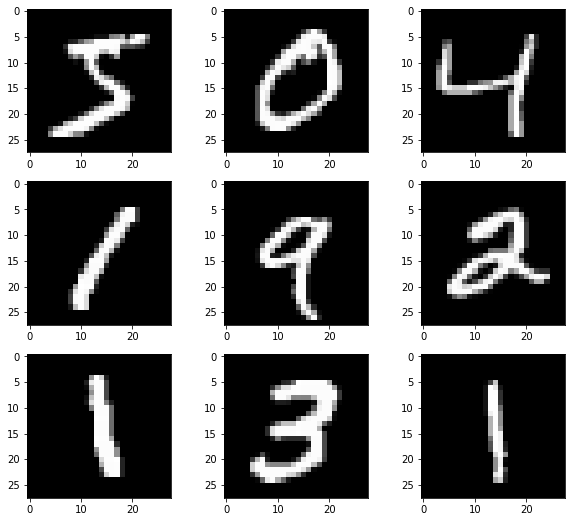

In [78]:
import matplotlib.pyplot as plt
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [79]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [80]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [81]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [82]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [83]:
x_train = x_train.reshape(len(x_train),-1)
y_train = y_train

In [84]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)


MiniBatchKMeans(n_clusters=10)

In [85]:
kmeans.labels_


array([4, 8, 2, ..., 6, 0, 9], dtype=int32)

In [86]:
def retrieve_info(cluster_labels,Y):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """
  # Initializing
    reference_labels = {}
  # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
      index = np.where(cluster_labels == i,1,0)
      num = np.bincount(Y[index==1]).argmax()
      reference_labels[i] = num
    return reference_labels


In [87]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [88]:
print(reference_labels)

{0: 6, 1: 6, 2: 4, 3: 1, 4: 3, 5: 7, 6: 8, 7: 2, 8: 0, 9: 4}


In [89]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[3 0 4 1 4 2 1 3 1 4 3 1 3 6 1 7 2 4 6 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [90]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5821333333333333


**Optimizing the Algorithm** 

In [91]:
# Function to calculate metrics for the model
def Calmetrics(model,out):
   print('Number of clusters is {}'.format(model.n_clusters))
   print('Inertia : {}'.format(model.inertia_))
   print('Homogeneity : {}'.format(metrics.homogeneity_score(out,model.labels_)))


In [92]:
from sklearn import metrics
cluster_number = [20,45,75,150,200,256]
for cnum in cluster_number:
    total = len(np.unique(y_test))
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = cnum)
    # Fitting the model to training set
    kmeans.fit(x_train)
    # Calculating the metrics
    Calmetrics(kmeans,y_train)
    # Calculating reference_labels
    ref = retrieve_info(kmeans.labels_,y_train)
    # ‘number_labels’ is a list which denotes the number displayed in image
    num = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        num[i] = ref[kmeans.labels_[i]]
    print('Accuracy score : {}'.format(accuracy_score(num ,y_train)))
    print('\n')

Number of clusters is 20
Inertia : 2143990.5
Homogeneity : 0.6084031883120046
Accuracy score : 0.705


Number of clusters is 45
Inertia : 1899376.5
Homogeneity : 0.7050452099753474
Accuracy score : 0.76985


Number of clusters is 75
Inertia : 1768545.25
Homogeneity : 0.7640691660609584
Accuracy score : 0.8367166666666667


Number of clusters is 150
Inertia : 1615368.5
Homogeneity : 0.8076315310563515
Accuracy score : 0.871


Number of clusters is 200
Inertia : 1556468.5
Homogeneity : 0.8279225976613481
Accuracy score : 0.8868166666666667


Number of clusters is 256
Inertia : 1504386.375
Homogeneity : 0.84419418139323
Accuracy score : 0.8992166666666667




In [94]:
# Testing model on Testing set
# Initialize the K-Means model
x_test = x_test.reshape(len(x_test),-1)

kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set
kmeans.fit(x_test)

# Calculating the metrics
Calmetrics(kmeans,y_test)

# Calculating the reference_labels
ref = retrieve_info(kmeans.labels_, y_test)

# ‘number_labels’ is a list which denotes the number displayed in image
num = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
    num[i] = ref[kmeans.labels_[i]]

print('Accuracy score : {}'.format(accuracy_score(num ,y_test)))
print('\n')

Number of clusters is 256
Inertia : 240210.5
Homogeneity : 0.8575811778759966
Accuracy score : 0.8937




Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)